In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sauga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sauga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
sns.set()

In [5]:
medicine = pd.read_csv('test.csv')
medicine.head(20)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [6]:
medicine.keys()

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [7]:
medicine.dropna(inplace = True)

In [8]:
medicine.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [9]:
medicine.duplicated().sum()

0

In [10]:
df = medicine.iloc[:20000]
df.shape

(20000, 7)

# Data Cleaning

In [11]:
df['review']

0        "I&#039;ve tried a few antidepressants over th...
1        "My son has Crohn&#039;s disease and has done ...
2                            "Quick reduction of symptoms"
3        "Contrave combines drugs that were used for al...
4        "I have been on this birth control for one cyc...
                               ...                        
20093    "As a birth control, this worked good. It did ...
20094    "Absolutely brilliant medicine....... I live a...
20095    "I was on tri-sprintec for years with no real ...
20096    "My experiance with the birth control rod. Its...
20097    "21 year old male. All my life I have been act...
Name: review, Length: 20000, dtype: object

In [12]:
new_list = [i.replace('"','')for i in (df['review'].tolist())]
new_list

['I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.',
 'My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically.',
 'Quick reduction of symptoms',
 'Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as an

In [13]:
df['review'] = new_list

<ipython-input-13-0332e2e2733a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = new_list


In [14]:
df['review'] = df['review'].str.replace('[#,@,&,;,$,0-9]',' ')
df.head()

<ipython-input-14-d5dd58a6047d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[#,@,&,;,$,0-9]',' ')
<ipython-input-14-d5dd58a6047d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.replace('[#,@,&,;,$,0-9]',' ')


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,I ve tried a few antidepressants over the...,10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",My son has Crohn s disease and has done v...,8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,Quick reduction of symptoms,9,29-Sep-17,3
3,39293,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,I have been on this birth control for one cycl...,9,22-Oct-15,4


In [15]:
df['drugName'] = df['drugName'].str.replace('[#,@,&,;,$,/]',' ')
df.head()

<ipython-input-15-2cf997b9a86f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['drugName'] = df['drugName'].str.replace('[#,@,&,;,$,/]',' ')
<ipython-input-15-2cf997b9a86f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drugName'] = df['drugName'].str.replace('[#,@,&,;,$,/]',' ')


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,I ve tried a few antidepressants over the...,10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",My son has Crohn s disease and has done v...,8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,Quick reduction of symptoms,9,29-Sep-17,3
3,39293,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9,5-Mar-17,35
4,97768,Cyclafem 1 35,Birth Control,I have been on this birth control for one cycl...,9,22-Oct-15,4


In [16]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [17]:
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

In [18]:
preprocess_tag = [text_prep(i) for i in df['review']]
df["preprocess_txt"] = preprocess_tag

<ipython-input-18-050e317fbd4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["preprocess_txt"] = preprocess_tag


In [19]:
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))


<ipython-input-19-8183cbe7585d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))


In [20]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,preprocess_txt,total_len
0,163740,Mirtazapine,Depression,I ve tried a few antidepressants over the...,10,28-Feb-12,22,"[tried, antidepressant, year, citalopram, fluo...",37
1,206473,Mesalamine,"Crohn's Disease, Maintenance",My son has Crohn s disease and has done v...,8,17-May-09,17,"[son, crohn, disease, done, well, asacol, comp...",24
2,159672,Bactrim,Urinary Tract Infection,Quick reduction of symptoms,9,29-Sep-17,3,"[quick, reduction, symptom]",3
3,39293,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9,5-Mar-17,35,"[contrave, combine, drug, used, alcohol, smoki...",64
4,97768,Cyclafem 1 35,Birth Control,I have been on this birth control for one cycl...,9,22-Oct-15,4,"[birth, control, one, cycle, reading, review, ...",63


# Sentiment Analysis

In [21]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

In [22]:
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

<ipython-input-22-5c4fc2cc475b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos_count'] = num_pos
<ipython-input-22-5c4fc2cc475b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neg_count'] = num_neg


In [23]:
#degree of positivity -> positive_negative_ratio. Range 0 - infinity.  
df['sentiment'] = round(df['pos_count'] / (df['neg_count']+1), 2)


<ipython-input-23-5aff8cfd13b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = round(df['pos_count'] / (df['neg_count']+1), 2)


In [24]:
df.iloc[10:20]

,uniqueID,drugName,condition,review,rating,date,usefulCount,preprocess_txt,total_len,pos_count,neg_count,sentiment
10,196802,Paroxetine,Hot Flashes,Holy Hell is exactly how I feel. I had been ta...,1,22-Feb-17,17,"[holy, hell, exactly, feel, taking, brisdelle,...",61,4,5,0.67
11,31947,Miconazole,Vaginal Yeast Infection,Honestly its day one on the day treatment. Y...,6,7-May-15,7,"[honestly, day, one, day, treatment, yes, burn...",15,2,3,0.50
12,4907,Belviq,Weight Loss,This is a waste of money. Did not curb my app...,1,23-Sep-14,57,"[waste, money, curb, appetite, make, feel, full]",7,0,1,0.00
13,66736,Seroquel,Schizoaffective Disorde,No problems watch what you eat.,10,8-Oct-14,19,"[problem, watch, eat]",3,0,1,0.00
14,97013,Ambien,Insomnia,Ditto on rebound sleepless when discontinued. ...,2,13-Jan-15,44,"[ditto, rebound, sleepless, discontinued, done...",21,1,3,0.25
15,213376,Nuvigil,Narcolepsy,A doctor in the ER prescribed me mg of Pro...,9,30-Jun-10,14,"[doctor, er, prescribed, mg, provigil, first, ...",41,2,0,2.00
16,151674,Chantix,Smoking Cessation,I smoked for + years. Took it for one week ...,10,14-Feb-15,26,"[smoked, year, took, one, week, think, possibl...",11,1,1,0.50
17,33173,Microgestin Fe 1 20,Acne,So I was on Ginanvi for about months before ...,3,22-Jun-17,1,"[ginanvi, month, switched, pill, due, high, co...",70,1,11,0.08
18,30401,Klonopin,Bipolar Disorde,This medication helped me sleep but eventual...,6,14-Jul-09,24,"[medication, helped, sleep, eventually, became...",15,2,5,0.33
19,152490,Ciprofloxacin,Urinary Tract Infection,After just dose of this ciprofloxacn I felt...,10,9-Jun-10,9,"[dose, ciprofloxacn, felt, better]",4,1,0,1.00


In [25]:
df['review'][15]

'A doctor in the ER prescribed me     mg of Provigil when I was first diagnosed with Narcolepsy. It didn      t seem to have any effect on me at all. Then I went to see my sleep doctor and he prescribed me     mg of Nuvigil. It finally allowed me to stay awake for an entire day. But if I went out somewhere I would be able to come home and take a nap and be fully awake again. Taking that with Xyrem makes me feel   %..not quite      but still pretty great.'

# Data Visualization

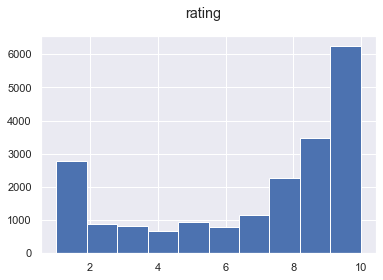

In [26]:
df['rating'].hist()
plt.suptitle("rating")
plt.show()

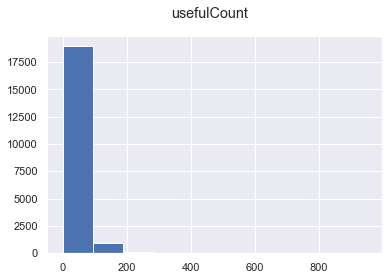

In [27]:
df['usefulCount'].hist()
plt.suptitle("usefulCount")
plt.show()

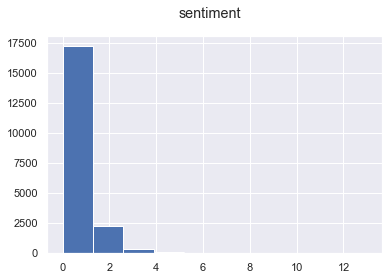

In [28]:
df['sentiment'].hist()
plt.suptitle("sentiment")
plt.show()

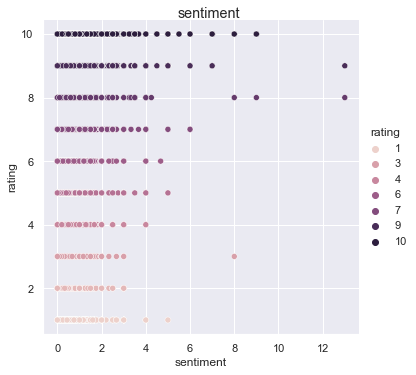

In [29]:
col = 'sentiment'
sns.relplot(x=col, y = "rating" , hue = "rating", data =df)
# Throw away Variable is _ in python which doesn't return cell output
_ = plt.suptitle(col, y=1)

In [30]:
df1 = df[['uniqueID','drugName','condition','review','rating','usefulCount','sentiment']]
df1.head()

,uniqueID,drugName,condition,review,rating,usefulCount,sentiment
0,163740,Mirtazapine,Depression,I ve tried a few antidepressants over the...,10,22,0.4
1,206473,Mesalamine,"Crohn's Disease, Maintenance",My son has Crohn s disease and has done v...,8,17,0.6
2,159672,Bactrim,Urinary Tract Infection,Quick reduction of symptoms,9,3,0.0
3,39293,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9,35,0.6
4,97768,Cyclafem 1 35,Birth Control,I have been on this birth control for one cycl...,9,4,1.0


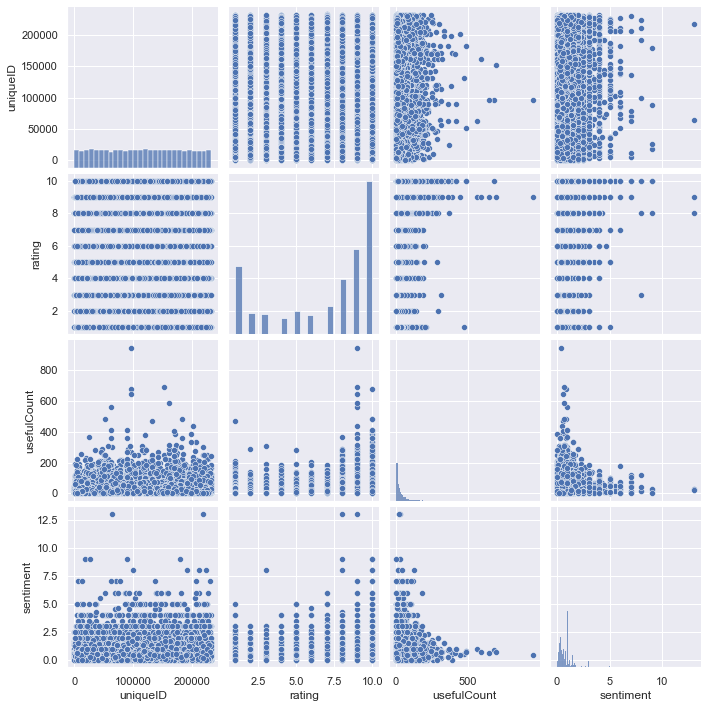

In [31]:
sns.pairplot(df1)

In [32]:
df1.describe()

,uniqueID,rating,usefulCount,sentiment
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,116257.990350,6.948350,28.047800,0.731737
std,66788.034754,3.298943,37.623692,0.727601
min,6.000000,1.000000,0.000000,0.000000
25%,58208.250000,4.000000,6.000000,0.290000
50%,116670.000000,8.000000,16.000000,0.540000
75%,173409.250000,10.000000,36.000000,1.000000
max,232284.000000,10.000000,949.000000,13.000000


# Calculating Weighted Average

Weighted Avg. = 

{usefulCount/(usefulCount + minUsefulCount) } * rating + { minUsefulCount/(minUsefulCount + UsefulCOunt) } * meanRating

Calclating Mean Rating

In [33]:
meanRating = df1['rating'].mean()
print(meanRating)

6.94835


Required Minimun UsefulCount and Minimum Sentiment Value (Cutoff Value)

In [34]:
minUsefulCount = df1['usefulCount'].quantile(0.60)
print(minUsefulCount)

22.0


In [35]:
minSentiment = df1['sentiment'].quantile(0.80)
print(minSentiment)

1.0


Filtered dataframe

In [36]:
df2 = df1.copy().loc[df1['usefulCount'] >= minUsefulCount]  
df2.shape

(8134, 7)

In [37]:
df3 = df2.copy().loc[df1['sentiment'] >= minSentiment]
df3.shape

(2597, 7)

Computing Weighted Avg.

In [38]:
def weighted_rating(X, minUsefulCount=minUsefulCount, meanRating=meanRating):
    usefulCount = X['usefulCount']
    rating = X['rating']
    return (usefulCount/(usefulCount+minUsefulCount) * rating) + (minUsefulCount/(minUsefulCount+usefulCount) * meanRating)

Calculating weighted average score

In [39]:
df3['score'] = df3.apply(weighted_rating, axis = 1)
df3.head()

,uniqueID,drugName,condition,review,rating,usefulCount,sentiment,score
27,35608,Ciclopirox,"Onychomycosis, Fingernail",Worked quickly and well. I learned by trial th...,8,38,1.5,7.614395
58,13407,Amphetamine dextroamphetamine,ADHD,Yes this medication does work wonders at fir...,2,57,3.0,3.378022
64,209386,Nifedipine,Raynaud's Syndrome,I started the nifedipine/Procardia this mornin...,1,22,1.0,3.974175
65,229572,Lurasidone,Schizophrenia,I am on day of this medication and the sid...,8,26,1.0,7.517994
66,105440,Afrezza,"Diabetes, Type 1",Since I was on the trials I put + months but ...,10,125,1.5,9.543290


Sort dataframe in descending order

In [40]:
df3 = df3.sort_values('score', ascending = False)

In [41]:
pd.set_option('precision',1)
df3.head(10)

,uniqueID,drugName,condition,review,rating,usefulCount,sentiment,score
19429,89826,Celexa,Depression,I was fortunate to have found an effective met...,10,414,1.0,9.8
7474,62760,Citalopram,Depression,I was fortunate to have found an effective met...,10,414,1.0,9.8
8873,197770,Desvenlafaxine,Depression,I ve never commented before online about ...,10,332,1.5,9.8
3169,206021,Pristiq,Depression,I ve never commented before online about ...,10,332,1.5,9.8
7610,46450,Modafinil,Depression,This is a WONDER DRUG in the use of depression...,10,287,1.0,9.8
2320,174887,AndroGel,"Hypogonadism, Male",I have been using Androgel pump since July ...,10,262,1.2,9.8
13767,183726,Cymbalta,Depression,Cymbalta is by far the best antidepressant on ...,10,254,1.5,9.8
1596,107565,Implanon,Birth Control,I have read reviews below and noticed most peo...,10,251,1.8,9.8
5405,225415,Bupropion,Depression,My wife passed away and I went into a deep dep...,10,249,1.0,9.8
17051,231123,Milnacipran,ibromyalgia,Savella works great. But the st week of side ...,10,245,1.6,9.7


In [42]:
df3['review'][7610]

'This is a WONDER DRUG in the use of depression. I have suffered for years with depression and never with any relief from the mainstream anti-depressants. Either the side effects were intolerable  or the medicine just didn      t work. Within   days of taking Provigil  I was the happiest  most productive I had been in a year. The first   days I was still really sleepy  and the  rd day  a little hyper  but after that day I have felt EXCELLENT. I don      t have anxiety attacks anymore and I get a full night of  quot good quot  sleep and wake up feeling extremely refreshed and I am happy again. I was on my couch for a straight   months sleeping and crying until I started this medicine. It literally saved my life.'

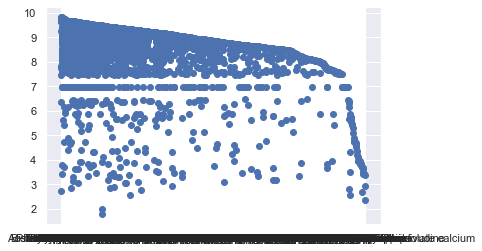

In [43]:
plt.scatter( df3['drugName'], df3['score'])
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=790, stop_words='english')

In [45]:
corpus = df3[['uniqueID','rating','usefulCount','sentiment']]
corpus

,uniqueID,rating,usefulCount,sentiment
19429,89826,10,414,1.0
7474,62760,10,414,1.0
8873,197770,10,332,1.5
3169,206021,10,332,1.5
7610,46450,10,287,1.0
...,...,...,...,...
16663,29178,1,61,1.2
7887,208976,1,62,2.0
11360,21092,1,74,2.0
18408,120016,1,109,1.0


In [46]:
A = cv.fit_transform(corpus).toarray()
A

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]], dtype=int64)

In [47]:
import pickle
bow_path = 'Bow model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

# Train Test  Split

In [48]:
X = df3[['uniqueID','rating','usefulCount','sentiment']]
X

,uniqueID,rating,usefulCount,sentiment
19429,89826,10,414,1.0
7474,62760,10,414,1.0
8873,197770,10,332,1.5
3169,206021,10,332,1.5
7610,46450,10,287,1.0
...,...,...,...,...
16663,29178,1,61,1.2
7887,208976,1,62,2.0
11360,21092,1,74,2.0
18408,120016,1,109,1.0


In [49]:
y = df3.score
y = y.astype(int)
y

19429    9
7474     9
8873     9
3169     9
7610     9
        ..
16663    2
7887     2
11360    2
18408    1
4284     1
Name: score, Length: 2597, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [51]:
X_train.shape

(1817, 4)

In [52]:
y_train.shape

(1817,)

In [53]:
print(y_test)

4698     9
1891     9
13934    7
1707     9
16452    8
        ..
7153     8
9594     9
1723     8
16751    8
2644     8
Name: score, Length: 780, dtype: int32


In [54]:
X_test

,uniqueID,rating,usefulCount,sentiment
4698,97028,10,96,1.2
1891,145869,10,86,1.0
13934,163662,8,80,2.2
1707,23659,10,75,1.0
16452,197949,9,86,2.0
...,...,...,...,...
7153,130016,10,38,1.7
9594,23993,10,78,1.5
1723,186205,9,39,1.0
16751,105295,9,87,1.2


In [55]:
y_test.shape

(780,)

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100 ,  max_features='auto')
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
import joblib
joblib.dump(classifier,'ClassifierRF Model')

['ClassifierRF Model']

In [58]:
classifier.score(X_test, y_test)

0.985897435897436

In [59]:
y_predicted = classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  2,   2,   0,   0,   0,   0,   0,   0],
       [  1,  21,   1,   0,   0,   0,   0,   0],
       [  0,   6,  11,   1,   0,   0,   0,   0],
       [  0,   0,   0,  19,   0,   0,   0,   0],
       [  0,   0,   0,   0,  58,   0,   0,   0],
       [  0,   0,   0,   0,   0, 104,   0,   0],
       [  0,   0,   0,   0,   0,   0, 371,   0],
       [  0,   0,   0,   0,   0,   0,   0, 183]], dtype=int64)